# Searching for Nice Sets: Binary Connectives

This notebook demonstrates searching for nice (complete and independent) sets using only binary connectives.

## Learning Objectives

By the end of this notebook, you will:
- Understand enumeration-based search
- Learn the classical result: maximum size is 3 for binary-only
- See examples of all size-3 nice sets
- Understand why size 4 is impossible
- Analyze arity distributions

In [1]:
# Setup Python path to find the src module
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✓ Project root added to path: {project_root}")

✓ Project root added to path: /home/benjamin/Documents/Philosophy/Projects/Z3/nice_connectives


## 0. Python Path Setup

First, let's ensure Python can find the project modules:

In [2]:
# Setup
from src.connectives import Connective
from src.constants import ALL_BINARY, AND, OR, XOR, TRUE, FALSE, NOT
from src.post_classes import is_complete
from src.independence import is_independent
from src.search import search_nice_sets_enumeration
from notebooks.utils import (
    display_truth_table,
    compare_connectives,
    print_nice_set_summary,
    plot_arity_distribution
)

import matplotlib.pyplot as plt
%matplotlib inline

print("✓ Setup complete")

✓ Setup complete


## 1. The Binary Connective Pool

Let's see what we're working with:

In [3]:
# Show all binary connectives
print(f"Total binary connectives: {len(ALL_BINARY)}")
print()
print("All 16 binary connectives:")
for i, conn in enumerate(ALL_BINARY):
    print(f"  {i+1:2d}. {conn.name:15} (arity {conn.arity}, truth table {conn.truth_table_int:2d})")

Total binary connectives: 16

All 16 binary connectives:
   1. FALSE_2         (arity 2, truth table  0)
   2. NOR             (arity 2, truth table  1)
   3. INHIBIT         (arity 2, truth table  2)
   4. NOT_X           (arity 2, truth table  3)
   5. CONV_INHIBIT    (arity 2, truth table  4)
   6. NOT_Y           (arity 2, truth table  5)
   7. XOR             (arity 2, truth table  6)
   8. NAND            (arity 2, truth table  7)
   9. AND             (arity 2, truth table  8)
  10. IFF             (arity 2, truth table  9)
  11. PROJ_Y          (arity 2, truth table 10)
  12. IMP             (arity 2, truth table 11)
  13. PROJ_X          (arity 2, truth table 12)
  14. CONV_IMP        (arity 2, truth table 13)
  15. OR              (arity 2, truth table 14)
  16. TRUE_2          (arity 2, truth table 15)


## 2. Search Strategy

The enumeration search works as follows:
1. Generate all subsets of size N
2. Check each subset for completeness
3. Check each complete subset for independence
4. Return all nice sets found

Let's search for nice sets of size 1, 2, and 3:

### Size 1: Single Connectives

Can a single binary connective be complete?

In [4]:
# Search for size-1 nice sets
size_1_nice_sets = search_nice_sets_enumeration(ALL_BINARY, target_size=1, max_depth=3)

print(f"Size-1 nice sets found: {len(size_1_nice_sets)}")
if size_1_nice_sets:
    for nice_set in size_1_nice_sets:
        print(f"  {[c.name for c in nice_set]}")
else:
    print("  None! Single binary connectives cannot be complete.")

Size-1 nice sets found: 2
  ['NOR']
  ['NAND']


### Size 2: Pairs of Connectives

Can two binary connectives form a nice set?

In [5]:
# Search for size-2 nice sets
print("Searching for size-2 nice sets...")
size_2_nice_sets = search_nice_sets_enumeration(ALL_BINARY, target_size=2, max_depth=3)

print(f"\nSize-2 nice sets found: {len(size_2_nice_sets)}")
if size_2_nice_sets:
    for nice_set in size_2_nice_sets[:5]:  # Show first 5
        print(f"  {[c.name for c in nice_set]}")
    if len(size_2_nice_sets) > 5:
        print(f"  ... and {len(size_2_nice_sets) - 5} more")
else:
    print("  None! Two binary connectives cannot be complete.")

Searching for size-2 nice sets...

Size-2 nice sets found: 43
  ['FALSE_2', 'NOR']
  ['FALSE_2', 'NAND']
  ['FALSE_2', 'IMP']
  ['FALSE_2', 'CONV_IMP']
  ['NOR', 'XOR']
  ... and 38 more


### Size 3: The Classical Result

Now let's search for size-3 nice sets:

In [6]:
# Search for size-3 nice sets
print("Searching for size-3 nice sets...")
print("(This may take a few seconds)")
print()

size_3_nice_sets = search_nice_sets_enumeration(ALL_BINARY, target_size=3, max_depth=3)

print(f"Size-3 nice sets found: {len(size_3_nice_sets)}")
print()

if size_3_nice_sets:
    print("Examples:")
    for nice_set in size_3_nice_sets[:10]:  # Show first 10
        names = [c.name for c in nice_set]
        print(f"  {names}")
    if len(size_3_nice_sets) > 10:
        print(f"  ... and {len(size_3_nice_sets) - 10} more")

Searching for size-3 nice sets...
(This may take a few seconds)

Size-3 nice sets found: 76

Examples:
  ['FALSE_2', 'NAND', 'IFF']
  ['FALSE_2', 'NAND', 'PROJ_Y']
  ['FALSE_2', 'NAND', 'PROJ_X']
  ['FALSE_2', 'NAND', 'OR']
  ['FALSE_2', 'AND', 'IFF']
  ['FALSE_2', 'AND', 'IMP']
  ['FALSE_2', 'AND', 'CONV_IMP']
  ['FALSE_2', 'IFF', 'IMP']
  ['FALSE_2', 'IFF', 'CONV_IMP']
  ['FALSE_2', 'IFF', 'OR']
  ... and 66 more


## 3. Analyzing a Size-3 Nice Set

Let's examine one size-3 nice set in detail:

Example nice set:
=== Size-3 Nice Set ===
Size: 3

Arity Distribution:
  Arity 2: 3 connectives (100.0%)

Connectives:
  - FALSE_2 (arity 2)
  - NAND (arity 2)
  - IFF (arity 2)

Complete: True
Independent: True



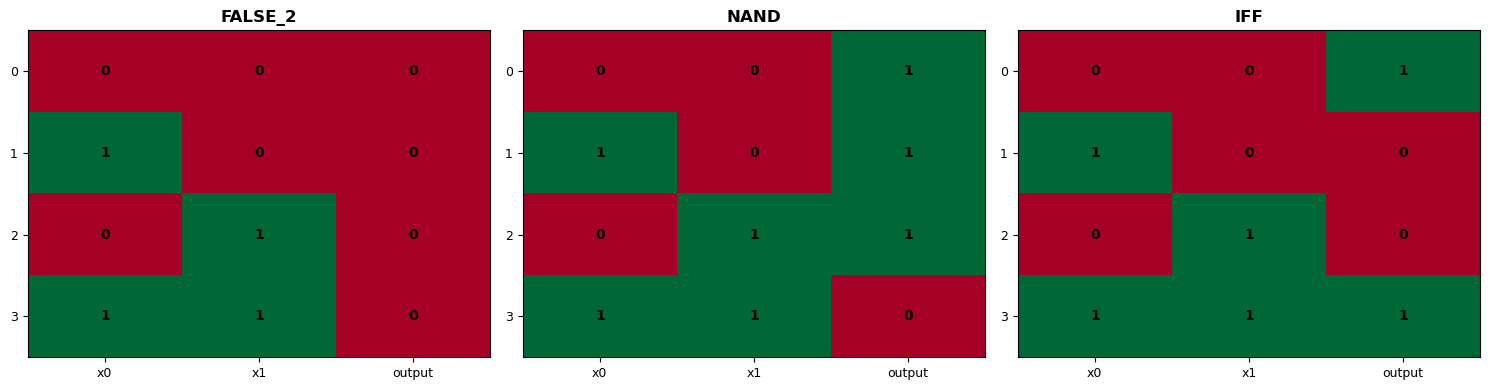

In [7]:
# Pick a nice set to analyze
if size_3_nice_sets:
    example_set = size_3_nice_sets[0]
    
    print("Example nice set:")
    print_nice_set_summary(example_set, "Size-3 Nice Set")
    print()
    
    # Verify it's complete
    print(f"Complete: {is_complete(example_set)}")
    print(f"Independent: {is_independent(example_set, max_depth=3)}")
    print()
    
    # Visualize
    fig = compare_connectives(example_set)
    plt.show()

## 4. The Maximum: Size 3

Let's verify that size 4 is impossible:

In [8]:
# Search for size-4 nice sets
print("Searching for size-4 nice sets...")
print("(This will take longer - checking many combinations)")
print()

size_4_nice_sets = search_nice_sets_enumeration(ALL_BINARY, target_size=4, max_depth=3)

print(f"Size-4 nice sets found: {len(size_4_nice_sets)}")
if not size_4_nice_sets:
    print("\n✓ Confirmed: Maximum size for binary-only is 3!")

Searching for size-4 nice sets...
(This will take longer - checking many combinations)

Size-4 nice sets found: 0

✓ Confirmed: Maximum size for binary-only is 3!


## 5. Why is Size 4 Impossible?

The constraint comes from **independence**:

- With 16 total binary connectives
- Any set of 4 creates many possible depth-3 compositions
- Eventually, one connective becomes definable from the other 3
- This violates independence

**The maximum size of 3 is a fundamental limit for binary-only connectives.**

## 6. Arity Distribution

Let's look at the arity distribution in size-3 nice sets:

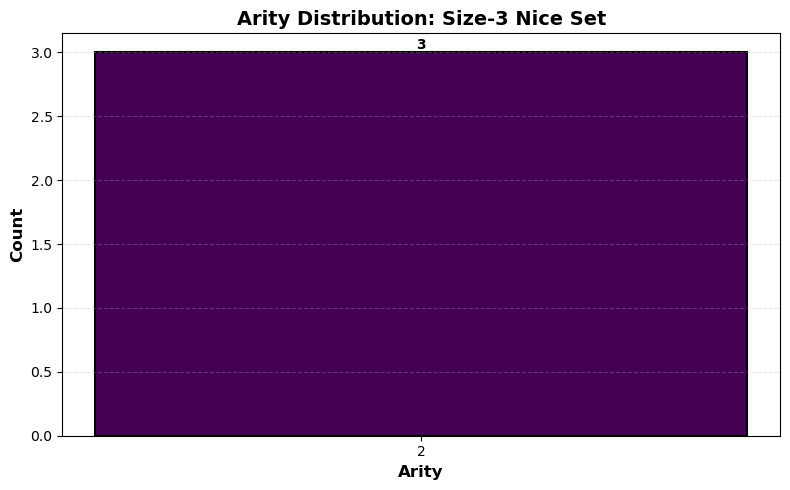

All connectives have arity 2 (binary)


In [9]:
# Analyze arity distribution
if size_3_nice_sets:
    example_set = size_3_nice_sets[0]
    fig = plot_arity_distribution(example_set, title="Arity Distribution: Size-3 Nice Set")
    plt.show()
    
    print("All connectives have arity 2 (binary)")

## 7. Summary Statistics

Let's summarize what we found:

In [10]:
# Summary statistics
print("Binary-Only Nice Set Search Results:")
print("=====================================")
print(f"Size 1: {len(size_1_nice_sets) if 'size_1_nice_sets' in locals() else 0} nice sets")
print(f"Size 2: {len(size_2_nice_sets) if 'size_2_nice_sets' in locals() else 0} nice sets")
print(f"Size 3: {len(size_3_nice_sets) if 'size_3_nice_sets' in locals() else 0} nice sets")
print(f"Size 4: {len(size_4_nice_sets) if 'size_4_nice_sets' in locals() else 0} nice sets")
print()
print("✓ Maximum nice set size with binary connectives: 3")

Binary-Only Nice Set Search Results:
Size 1: 2 nice sets
Size 2: 43 nice sets
Size 3: 76 nice sets
Size 4: 0 nice sets

✓ Maximum nice set size with binary connectives: 3


## Summary

In this notebook, you learned:
- ✓ How to search for nice sets using enumeration
- ✓ The classical result: maximum size is 3 for binary-only
- ✓ Examples of size-3 nice sets
- ✓ Why size 4 is impossible (independence constraint)
- ✓ How to analyze arity distributions

## Key Finding

**Maximum nice set size with binary connectives only: 3**

To find larger nice sets, we need to include higher-arity connectives!

## Next Steps

- **06_search_ternary.ipynb** - Search with ternary connectives (size 17+!)
- **[Research Results](../docs/RESULTS.md)** - Current findings (size-35!)